In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from atm_info import *

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
database = pd.read_excel("./Data/DATA_TOT_UBT.xlsx")
database = database.query("Enthalpie<300")
database = database.query("a_conv<9.5") # Cleaning 
database

,Unnamed: 0,DIR,prototype,nT,X1,X2,X3,X4,a,b,...,ElecN4,Eval1,Eval2,Eval3,Eval4,EA,EB,EC,ED,eVal_tot
0,0,10-Mo,phase-W,1,Mo,Mo,Mo,Mo,2.728527,2.728527,...,0.131267,6,6,6,6,-10.94954,-10.94954,-10.94954,-10.94954,24
1,1,11-Nb_sv,phase-W,1,Nb,Nb,Nb,Nb,2.865372,2.865372,...,0.128078,5,5,5,5,-10.21612,-10.21612,-10.21612,-10.21612,20
2,2,12-Ni,phase-W,1,Ni,Ni,Ni,Ni,2.423936,2.423936,...,0.147207,10,10,10,10,-5.46695,-5.46695,-5.46695,-5.46695,40
3,3,13-P,phase-W,1,P,P,P,P,2.639540,2.639540,...,0.206931,5,5,5,5,-5.40967,-5.40967,-5.40967,-5.40967,20
4,4,14-Sb,phase-W,1,Sb,Sb,Sb,Sb,3.280747,3.280747,...,0.191877,5,5,5,5,-4.13565,-4.13565,-4.13565,-4.13565,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76723,34051,74-Cu-Zn-Sn2,Heusler-Inverse,4,Sn,Cu,Zn,Sn,4.946313,4.946313,...,0.178052,4,11,12,4,-3.83392,-3.72720,-1.10764,-3.83392,31
76724,34052,75-Cu-Zn-Sb2,Heusler-Inverse,4,Sb,Cu,Zn,Sb,4.977904,4.977904,...,0.191877,5,11,12,5,-4.13565,-3.72720,-1.10764,-4.13565,33
76725,34053,7-Mn-Co-Si2,Heusler-Inverse,4,Si,Mn,Co,Si,4.011498,4.011498,...,0.178503,4,7,9,4,-5.17948,-8.97821,-7.03500,-5.17948,24
76726,34054,8-Mn-Co-P2,Heusler-Inverse,4,P,Mn,Co,P,4.034537,4.034537,...,0.206931,5,7,9,5,-5.40967,-8.97821,-7.03500,-5.40967,26


In [9]:
X = database[['X1','X2','X3','X4']]
y = database['a_conv']

Text(0, 0.5, ' a_conv ')

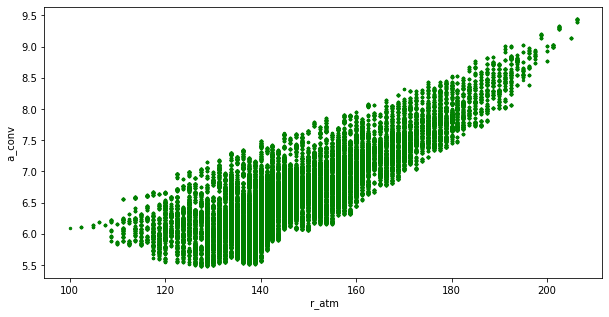

In [10]:
# Trace 
Data = database.copy()
r_atm = (Data["RayD1"]+Data["RayD2"]+Data["RayD3"]+Data["RayD4"])/4

plt.figure(figsize=(10, 5))
plt.scatter(r_atm, Data["a_conv"], s=6,c='g')
plt.xlabel(' r_atm')
plt.ylabel(' a_conv ')

In [11]:
# Construction of X 
ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(database[['X1','X2','X3','X4']]) 
Features = [["RayD1", "RayD2","RayD3","RayD4"], ['ElecN1', 'ElecN2', 'ElecN3', 'ElecN4'], ["eVal_tot"]]

for i in Features : 
    Add_Features = pd.DataFrame(MinMaxScaler().fit_transform(database[i]), columns=i) 
    X = np.append(X, Add_Features, axis=1)
    
# Construction of y 
y = database['a_conv']

print(len(X), len(y))

76586 76586


In [12]:
# Randomly split the database into 90% trains and 10% tests
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.10, random_state=46, shuffle = True)

In [13]:
model = MLPRegressor(random_state=10, 
                     max_iter=1000000,
                     activation='tanh',
                     alpha=0.0001,
                     hidden_layer_sizes=(200,200,200), 
                     learning_rate='constant', 
                     solver='sgd')
model.fit(X_train,y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(200, 200, 200),
             max_iter=1000000, random_state=10, solver='sgd')

R2 on training data = 0.9654924234178107
R2 on testing data = 0.9664352043320332
RMSE on train data =  0.11908999898758725
RMSE on test data =  0.11964319733293573


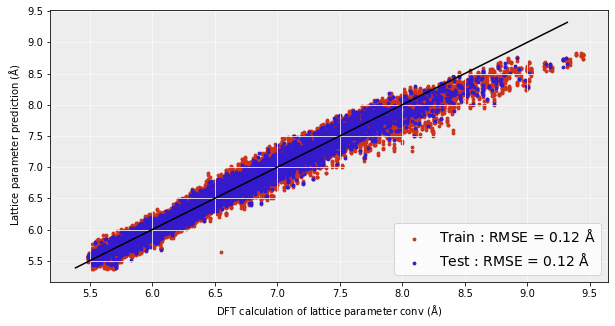

In [36]:
# R2 on train and test 
R2_train = model.score(X_train, y_train)
print("R2 on training data =", R2_train)
R2_test = model.score(X_test, y_test)
print("R2 on testing data =", R2_test)

# Make predictions using the testing set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_pred)
#print("MSE on train data = ", MSE_train)
RMSE_train = math.sqrt(MSE_train)
print("RMSE on train data = ", RMSE_train)

MSE_test = mean_squared_error(y_test, y_test_pred)
#print("MSE on test data = ", MSE_test)
RMSE_test = math.sqrt(MSE_test)
print("RMSE on test data = ", RMSE_test)

# Plot 
x_tmp = np.linspace(min(min(y_test_pred), min(y_test)),max(max(y_test_pred),max(y_test)),100)
y_tmp = np.linspace(min(min(y_test_pred), min(y_test)),max(max(y_test_pred),max(y_test)),100)

fig, ax = plt.subplots(figsize=(10, 5), facecolor=(1., 1., 1.))

ax.scatter(y_train, y_train_pred, s=8,color=(0.8, 0.2, 0.1), label='Train : RMSE = ' + str(round(RMSE_train,2)) + r' $\mathrm{\AA}$')
ax.scatter(y_test, y_test_pred, s=8,color=(0.2, 0.1, 0.8),label='Test : RMSE = '+ str(round(RMSE_test,2))+ r' $\mathrm{\AA}$')

plt.ylabel(' Lattice parameter prediction ($\mathrm{\AA}$)')
plt.xlabel('DFT calculation of lattice parameter conv ($\mathrm{\AA}$)')

ax.plot(x_tmp,y_tmp,c='k')
plt.grid(color=(0.98, 0.98, 0.98)) # 0=noir et 1=blanc 
ax.set_facecolor((0.93, 0.93, 0.93))
ax.legend(loc=4, fontsize=14)
plt.savefig('Image/Train_Test_a_conv_RMSE_UBT.png',dpi=1500)

In [9]:
%%time

# Cross-validation 
CV_RN = cross_val_score(model, X, y, cv = KFold(n_splits=10, shuffle=True,random_state=23), n_jobs =-1, scoring='neg_mean_squared_error' )
rmse_RN = np.sqrt(-1*(CV_RN))
moyennes_RN = np.mean(rmse_RN)
std_RN = np.std(rmse_RN)

print("CV on RMSE test : ", rmse_RN)
print("Moyenne du RMSE : ", moyennes_RN)
print("l'écart-type du RMSE : ", std_RN)

CV on RMSE test :  [0.11828221 0.11915056 0.11911298 0.11559698 0.11897717 0.12041871
 0.11822639 0.12061214 0.12055952 0.11862965]
Moyenne du RMSE :  0.11895663095239835
l'écart-type du RMSE :  0.001410403270647602
Wall time: 1min 19s


## Quaternary prediction 

In [37]:
def return_radius_normed(element):
    return ((return_radius(element)-database['RayD1'].min())/(database['RayD1'].max()-database['RayD1'].min()))

def return_elec_neg_normed(element):
    return ((return_elec_neg(element)-database['ElecN1'].min())/(database['ElecN1'].max()-database['ElecN1'].min()))

def return_valen_tot_normed(A, B, C, D):
    element = return_valen_el(A)+return_valen_el(B)+return_valen_el(C)+return_valen_el(D)
    return pd.DataFrame([(element-database['eVal_tot'].min())/(database['eVal_tot'].max()-database['eVal_tot'].min())])
 
def return_calcul(A,B,C,D):
    config=X[(X['X1'] == A) & (X['X2'] == B) & (X['X3'] == C) & (X['X4'] == D)]
    return y[config.index[0]]

def return_predic(A, B, C, D, ohe, model):
    A_Pred=pd.DataFrame([[A,B,C,D]], columns = ['X1','X2','X3','X4'])
    X_pred = ohe.transform(A_Pred)
    for i in [A_Pred.applymap(return_radius_normed), A_Pred.applymap(return_elec_neg_normed), return_valen_tot_normed(A,B,C,D)] : 
        X_pred = np.append(X_pred, i, axis=1) 
    pred = model.predict(X_pred)[0]
    return pred

In [38]:
# Prediction of 24,000 quaternary configurations 
Quatern = pd.read_excel("./Data/Quaternaires_24000_DFT.xlsx")
Quatern

,Unnamed: 0,DIR,prototype,A,B,C,D,nA,nB,nC,...,dosf,dosfat,eta,bu,bd,abd,X1,X2,X3,X4
0,0,1000-Ta-W-Fe-Co,Heusler_Quaternaires_C1,Ta,W,Fe,Co,1,1,1,...,3.950862,0.987715,metal,3.824956,-0.125906,0.125906,Ta,W,Fe,Co
1,1,100-Ti-Cr-W-Sn,Heusler_Quaternaires_C1,Ti,Cr,W,Sn,1,1,1,...,9.848608,2.462152,metal,4.919480,-4.929128,4.929128,Ti,Cr,W,Sn
2,2,101-Zr_sv-Cr-Zn-Al,Heusler_Quaternaires_C1,Zr,Cr,Zn,Al,1,1,1,...,1.189263,0.297316,metal,0.365224,-0.824039,0.824039,Zr,Cr,Zn,Al
3,3,102-Zr_sv-Cr-Sr_sv-Fe,Heusler_Quaternaires_C1,Zr,Cr,Sr,Fe,1,1,1,...,5.046228,1.261557,metal,3.678260,-1.367967,1.367967,Zr,Cr,Sr,Fe
4,4,103-W-Ba_sv-La-P,Heusler_Quaternaires_C1,W,Ba,La,P,1,1,1,...,4.560678,1.140170,metal,0.847548,-3.713130,3.713130,W,Ba,La,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,2995,997-Zr_sv-Zn-V-Mo,Heusler_Quaternaires_C3,Zr,Zn,V,Mo,1,1,1,...,5.233345,1.308336,metal,2.616672,-2.616672,2.616672,V,Mo,Zn,Zr
23996,2996,998-Cr-Sb-La-Cu,Heusler_Quaternaires_C3,Cr,Sb,La,Cu,1,1,1,...,9.437861,2.359465,metal,4.717477,-4.720384,4.720384,La,Cu,Sb,Cr
23997,2997,999-Mo-P-Sr_sv-Ni,Heusler_Quaternaires_C3,Mo,P,Sr,Ni,1,1,1,...,3.534955,0.883739,metal,1.259805,-2.275151,2.275151,Sr,Ni,P,Mo
23998,2998,99-V-Ni-Mo-W,Heusler_Quaternaires_C3,V,Ni,Mo,W,1,1,1,...,6.452037,1.613009,metal,3.226019,-3.226019,3.226019,Mo,W,Ni,V


In [39]:
%%time
Prediction = Quatern.copy()
Prediction[["a_conv"]] = Prediction[["a"]]*math.sqrt(2)
Prediction = Prediction[["X1","X2","X3","X4","a_conv"]]
Prediction['Pred_a_conv'] = Prediction.apply(lambda x: return_predic(x.X1, x.X2, x.X3, x.X4, ohe, model), axis=1)
Prediction

Wall time: 1min 24s


,X1,X2,X3,X4,a_conv,Pred_a_conv
0,Ta,W,Fe,Co,6.065858,5.901907
1,Ti,Cr,W,Sn,6.333286,6.367392
2,Zr,Cr,Zn,Al,6.431422,6.349480
3,Zr,Cr,Sr,Fe,6.898790,6.838943
4,W,Ba,La,P,7.316127,7.422684
...,...,...,...,...,...,...
23995,V,Mo,Zn,Zr,6.383189,6.383846
23996,La,Cu,Sb,Cr,6.972955,6.878300
23997,Sr,Ni,P,Mo,6.742932,6.694171
23998,Mo,W,Ni,V,6.063452,5.878053


MSE on quatern data =  0.012025156384930352
RMSE on quatern data =  0.10965927404889361


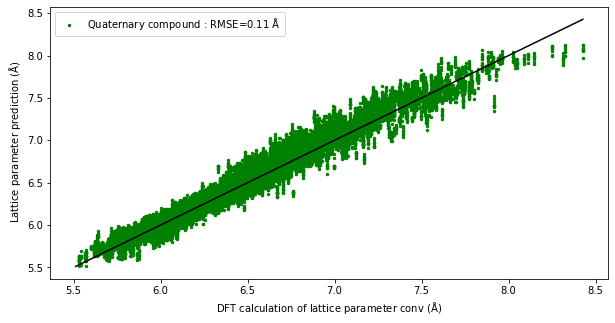

In [42]:
y_pred = Prediction['Pred_a_conv']
y_calc = Prediction['a_conv']

MSE_q = mean_squared_error(y_calc, y_pred)
print("MSE on quatern data = ", MSE_q)
RMSE_q = math.sqrt(MSE_q)
print("RMSE on quatern data = ", RMSE_q)

x_tmp = np.linspace(min(min(y_pred), min(y_calc)),max(max(y_pred),max(y_calc)),100)
y_tmp = np.linspace(min(min(y_pred), min(y_calc)),max(max(y_pred),max(y_calc)),100)

plt.figure(figsize=(10, 5))
plt.scatter(y_calc, y_pred, s=6,c='g', label='Quaternary compound : RMSE=' + str(round(RMSE_q ,2)) + r' $\mathrm{\AA}$')

plt.ylabel(' Lattice parameter prediction ($\mathrm{\AA}$)')
plt.xlabel('DFT calculation of lattice parameter conv ($\mathrm{\AA}$)')
plt.plot(x_tmp,y_tmp,c='k')
plt.legend(loc=2)
plt.savefig("Image/Prediction_a_conv_RMSE_Q.png",dpi=1500)